In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_image(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

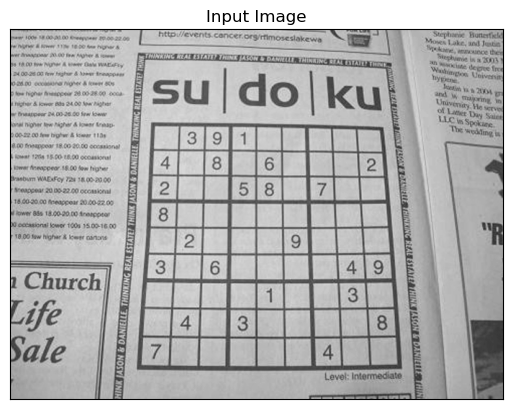

In [3]:
im = cv2.imread('sudoku.png', 0)

show_image(im, 'Input Image')

In [4]:
def apply_binary(img, T):
    img = np.array(img)
    out_img = np.zeros_like(img)
    r, c = img.shape
    
    for i in range(r):
        for j in range(c):
            if img[i, j] > T:
                out_img[i, j] = 255
    
    return out_img

def detect_edges(img, T):
    img = np.array(img)
    edges = cv2.Laplacian(img, -1)
    edges = apply_binary(edges, T)
    show_image(edges, 'Detected Edges')
    return edges

In [37]:
def hough_transform(edge_img, thresh):
    r, c = edge_img.shape
    M = int((r ** 2 + c ** 2) ** 0.5)
    accumulator = np.zeros((2*M, 180))
    
    for i in range(r):
        for j in range(c):
            if edge_img[i, j] == 0:
                continue
            for t in range(180):
                rad = np.deg2rad(t-90)
                rho = i * np.sin(rad) + j * np.cos(rad)
                m = int(rho) + M
                accumulator[m, t] += 1
    
    lines = []
    for m, arr in enumerate(accumulator):
        for t, val in enumerate(arr):
            if val >= thresh:
                lines.append((m-M, np.deg2rad(t-90)))
    
    return lines

def draw_lines(img, lines):
    img = np.array(img)
    r, c = img.shape
    img = cv2.merge([img, img, img])
    
    for pho, theta in lines:
        if np.sin(theta) == 0:
            continue
        for x in range(r):
            y = (pho - x * np.cos(theta)) / np.sin(theta)
            if y == np.inf or y == np.NaN:
                continue
            y = int(y)
            if y > 0 and y < c:
                img[x, y] = [0, 0, 255]

    return img

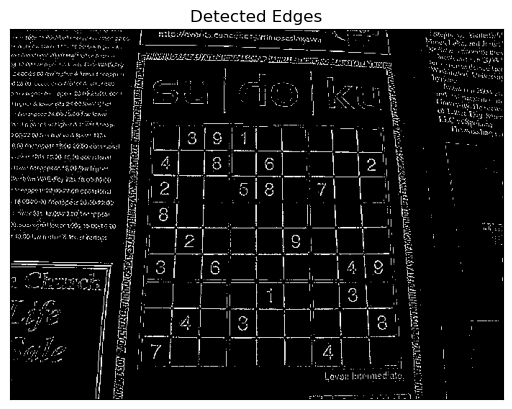

In [6]:
edges_img = detect_edges(im, 50)

In [40]:
lines = hough_transform(edges_img, 100)

In [41]:
final_img = draw_lines(im, lines)

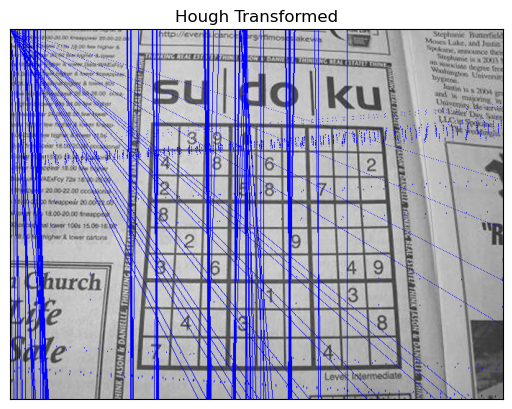

In [42]:
show_image(final_img, 'Hough Transformed')